In [13]:
#Exercise 1:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# Load Student Mental health dataset
df = pd.read_csv("student_mental_health.csv")

print(df)

Saving student_mental_health.csv to student_mental_health (1).csv
               Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your C

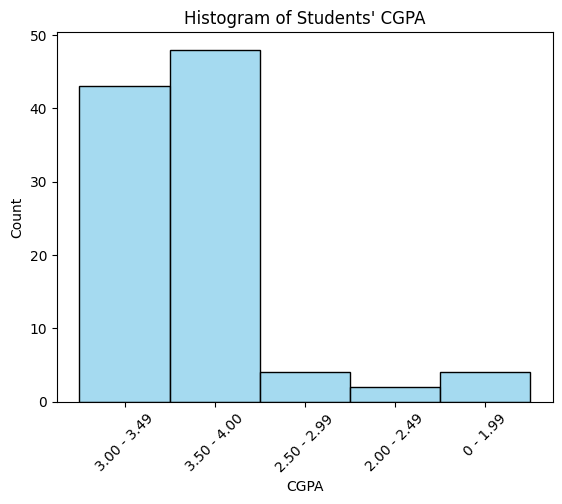

In [22]:
#Exercise 1 - continued
#data is a mess:

df["What is your CGPA?"] = df["What is your CGPA?"].str.strip()


sns.histplot(df['What is your CGPA?'],color="skyblue", discrete=True)

plt.title("Histogram of Students' CGPA")
plt.xlabel("CGPA")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


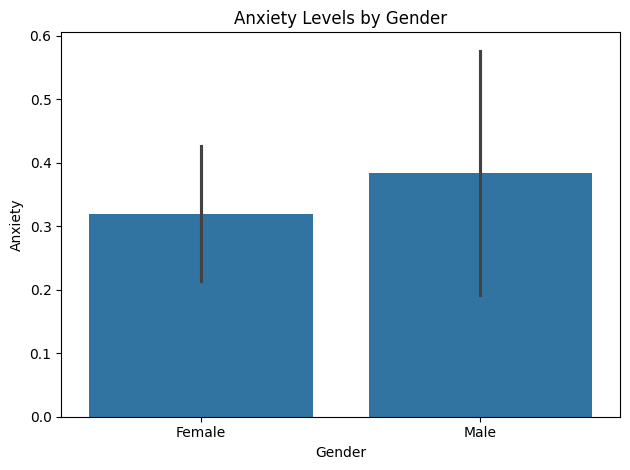

In [33]:
#Exercise 2:
df["Anxiety_numeric"] = df["Do you have Anxiety?"].map({"Yes": 1, "No": 0})

sns.barplot(x='Choose your gender', y='Anxiety_numeric', data = df)
plt.title('Anxiety Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Anxiety')
plt.tight_layout()
plt.show()

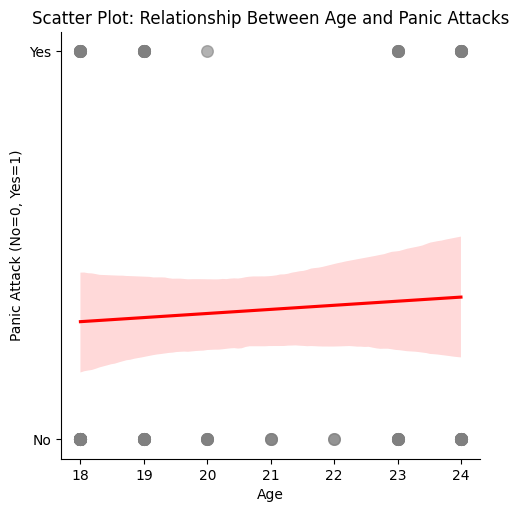

In [31]:
# Create scatter plot with regression line

df["Panic_numeric"] = df["Do you have Panic attack?"].map({"Yes": 1, "No": 0})

sns.lmplot(x='Age', y='Panic_numeric', data=df, scatter_kws={"alpha":0.6, "s":70, "color":"gray"},
    line_kws={"color":"red"})

# Add labels
plt.title("Scatter Plot: Relationship Between Age and Panic Attacks")
plt.xlabel("Age")
plt.ylabel("Panic Attack (No=0, Yes=1)")
plt.yticks([0,1], ["No", "Yes"])  # make y-axis readable
plt.show()



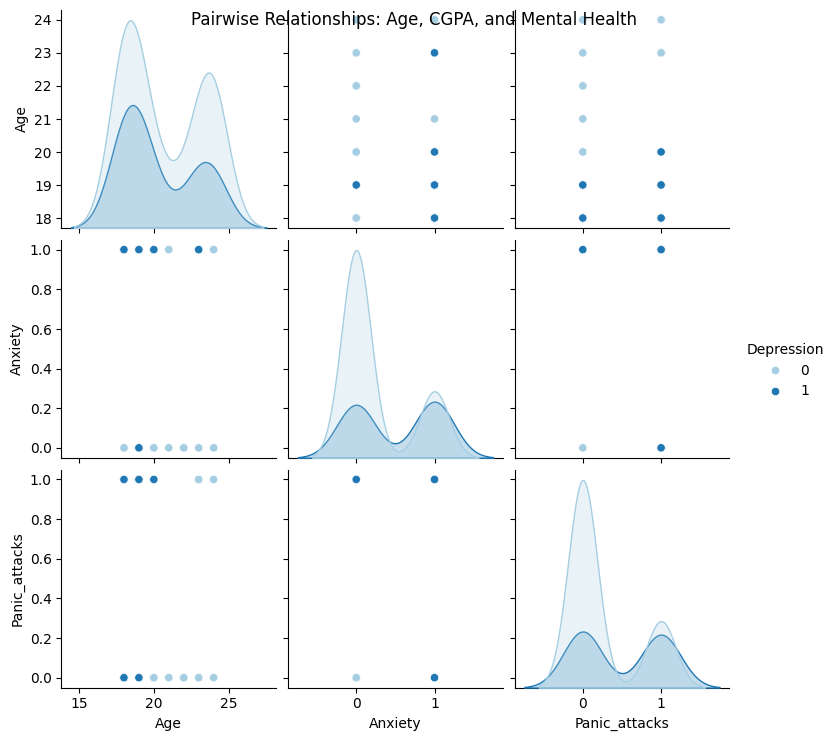

In [36]:
#Exercise 4:

df["Depression"] = df["Do you have Depression?"].map({"Yes": 1, "No": 0})
df["Anxiety"]    = df["Do you have Anxiety?"].map({"Yes": 1, "No": 0})
df["Panic_attacks"] = df["Do you have Panic attack?"].map({"Yes": 1, "No": 0})
df = df.rename(columns={"What is your CGPA?": "CGPA"})


subset = df[["Age", "CGPA", "Depression", "Anxiety", "Panic_attacks"]]

sns.pairplot(
    subset,
    hue="Depression",   # color by depression status
    diag_kind="kde",
    palette="Paired"
)

plt.suptitle("Pairwise Relationships: Age, CGPA, and Mental Health")
plt.show()


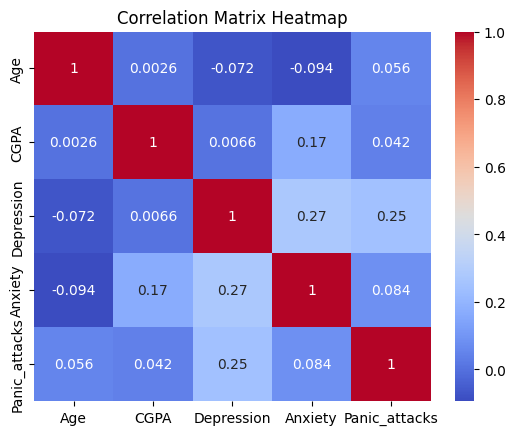

In [40]:
#Exercise 5:

# 1) Clean and set explicit order for CGPA ranges
df["CGPA"] = df["CGPA"].str.strip()
cgpa_order = ["0 - 1.99","2.00 - 2.49","2.50 - 2.99","3.00 - 3.49","3.50 - 4.00"]
df["CGPA_ord"] = pd.Categorical(df["CGPA"], categories=cgpa_order, ordered=True)

# 2) Convert ordered categories to integers (0..4)
df["CGPA"] = df["CGPA_ord"].cat.codes  # -1 means missing/unknown


subset = df[["Age", "CGPA", "Depression", "Anxiety", "Panic_attacks"]]

correlation_matrix = subset[["Age", "CGPA", "Depression", "Anxiety", "Panic_attacks"]].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


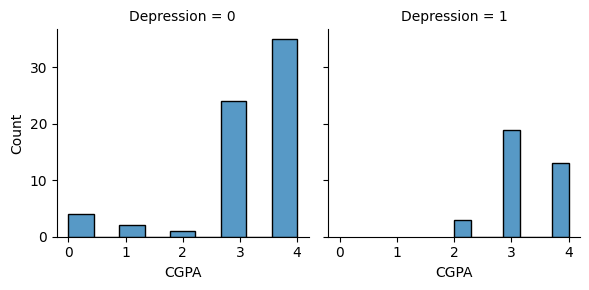

<Figure size 640x480 with 0 Axes>

In [42]:
#Exercise 6: Create a facet grid
g = sns.FacetGrid(df, col="Depression")
g.map_dataframe(sns.histplot, "CGPA")

plt.show()

g.set_axis_labels("CGPA", "Count")
g.set_titles(col_template="Depression: {col_name}")  # col_name will be 0 or 1
plt.suptitle("Distribution of CGPA by Depression Status", y=1.05, fontsize=14)

plt.show()

